## Business Understanding - What factors highly influence the prices of listings in Seattle?

**Kaggle has provided below description and dataset for the Seattle Airbnb Open Data**

(The description is given below and can be found at this kaggle link along with the dataset: https://www.kaggle.com/airbnb/seattle)

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.


## Objective

To find out the parameters that are affecting prices of the listings in Seattle Airbnb.

**Dataset:**
listings.csv
calendar.csv

**Related Interest Topics:**
1. How different Room Type can affect the Prices of the listings?
2. How Property Type can affect the prices of the listings?
3. How number of Bedroom can affect the prices of the listings?
4. Prices being affected by Seasonal Patterns.

**Steps to Analysis:**
Data Understanding and Preparation
    1. Cleaning the Data
    2. Categorizing listings based on Room Type
    3. Visualizing the above catorization
    4. Analysing and plotting the number of listings based on their property type
    5. Analysing the prices for all Room Type and Property Type and plotting them on the heatmap
    6. Analysing the number of Bedroom affecting the price of the listings
    7. Analysing the average prices for each month and find out the month for which the average prices of the listings were high


### 1.  Cleaning the data

Replace NaN values with 0
Converting prices to float

In [18]:
import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings.csv')

inputDF= inputDF[['id','name','summary','space','description','host_id','host_name','host_since',
                  'host_response_time','street','review_scores_rating','neighbourhood','neighbourhood_cleansed',
                  'zipcode','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms',
                 'beds','amenities','number_of_reviews','instant_bookable','cancellation_policy','reviews_per_month','price']]

inputDF.head()

,id,name,summary,space,description,host_id,host_name,host_since,host_response_time,street,...,accommodates,bathrooms,bedrooms,beds,amenities,number_of_reviews,instant_bookable,cancellation_policy,reviews_per_month,price
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,956883,Maija,8/11/2011,within a few hours,"Gilman Dr W, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207,f,moderate,4.07,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,5177328,Andrea,2/21/2013,within an hour,"7th Avenue West, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43,f,strict,1.48,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,16708587,Jill,6/12/2014,within a few hours,"West Lee Street, Seattle, WA 98119, United States",...,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20,f,strict,1.15,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,9851441,Emily,11/6/2013,NaN,"8th Avenue West, Seattle, WA 98119, United States",...,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,f,flexible,NaN,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,1452570,Emily,11/29/2011,within an hour,"14th Ave W, Seattle, WA 98119, United States",...,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38,f,strict,0.89,$450.00


In [19]:
#replacing NaN with '0'
inputDF.fillna(0, inplace=True)

inputDF.head()

,id,name,summary,space,description,host_id,host_name,host_since,host_response_time,street,...,accommodates,bathrooms,bedrooms,beds,amenities,number_of_reviews,instant_bookable,cancellation_policy,reviews_per_month,price
0,241032,Stylish Queen Anne Apartment,0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,956883,Maija,8/11/2011,within a few hours,"Gilman Dr W, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207,f,moderate,4.07,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,5177328,Andrea,2/21/2013,within an hour,"7th Avenue West, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43,f,strict,1.48,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,16708587,Jill,6/12/2014,within a few hours,"West Lee Street, Seattle, WA 98119, United States",...,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20,f,strict,1.15,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,0,A charming apartment that sits atop Queen Anne...,9851441,Emily,11/6/2013,0,"8th Avenue West, Seattle, WA 98119, United States",...,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",0,f,flexible,0.00,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,1452570,Emily,11/29/2011,within an hour,"14th Ave W, Seattle, WA 98119, United States",...,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38,f,strict,0.89,$450.00


In [30]:
#extract prices
price = inputDF['price']

#clean the data to make it float
prices=[]

for p in price:
    p=float(p[1:].replace(',',''))
    #print(p)
    prices.append(p)
    #print(prices)
    
# replacing price column with new float based values (prices)

inputDF['price']=prices

In [31]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

,id,name,summary,space,description,host_id,host_name,host_since,host_response_time,street,...,accommodates,bathrooms,bedrooms,beds,amenities,number_of_reviews,instant_bookable,cancellation_policy,reviews_per_month,price
0,241032,Stylish Queen Anne Apartment,0,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,956883,Maija,8/11/2011,within a few hours,"Gilman Dr W, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",207,f,moderate,4.07,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,5177328,Andrea,2/21/2013,within an hour,"7th Avenue West, Seattle, WA 98119, United States",...,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",43,f,strict,1.48,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,16708587,Jill,6/12/2014,within a few hours,"West Lee Street, Seattle, WA 98119, United States",...,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",20,f,strict,1.15,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,1452570,Emily,11/29/2011,within an hour,"14th Ave W, Seattle, WA 98119, United States",...,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",38,f,strict,0.89,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,326758,Andrew,12/25/2010,0,"West Comstock Street, Seattle, WA 98119, Unite...",...,2,1.0,1.0,1.0,"{""Wireless Internet"",""Free Parking on Premises...",17,f,strict,2.45,120.0


### 2. Categorizing listings based on Room Type


In [40]:
roomTypeDF= inputDF.groupby('room_type').id.count()
print(roomTypeDF)

room_type
Entire home/apt    1805
Private room        947
Shared room          91
Name: id, dtype: int64


### 3. Visualizing the above catorization

Counter({'Entire home/apt': 1805, 'Private room': 947, 'Shared room': 91})


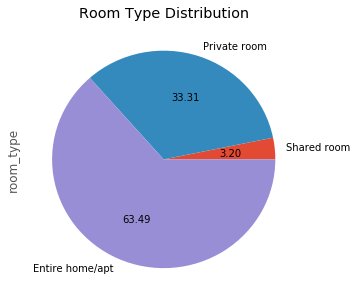

In [60]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room=inputDF.room_type
r = Counter(room)
print(r)

room_df.columns = ['room_type']

room_df.plot.pie(y = 'room_type', 
                 figsize=(5,5), 
                 fontsize = 10, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

### 4. Analysing and plotting the number of listings based on their property type

      property_type  Number_Of_Listings
0         Apartment                1194
1   Bed & Breakfast                  26
2              Boat                   5
3          Bungalow                   2
4             Cabin                  17
5         Camper/RV                   8
6            Chalet                   1
7       Condominium                  68
8              Dorm                   1
9             House                1403
10             Loft                  22
11            Other                  13
12             Tent                   4
13        Townhouse                  78
14        Treehouse                   1


Text(0,0.5,'Number_Of_Listings')

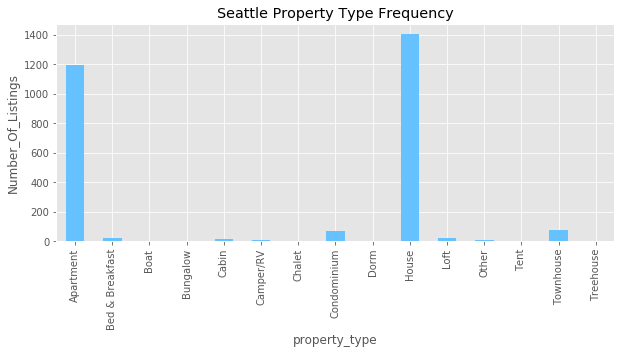

In [68]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytypeDF= inputDF.groupby('property_type').id.count()
propertytypeDF=propertytypeDF.reset_index()
propertytypeDF=propertytypeDF.rename(columns={'id':'Number_Of_Listings'})
print(propertytypeDF)

propertytypeDF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(10,4), 
           title = 'Seattle Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number_Of_Listings')

# Conclusion:
# if you see below results, you can see that Apartment and House are prefered mostly by clients/customers/travelers

### 5. Analysing the prices for all Room Type and Property Type and plotting them on the heatmap

In [80]:
# arranging the prices based on the property type and room type.
# Here we can determine and analyse that how much an individual room type will cost in the different property type.

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF = roomProperty_DF.sort_values('price')
print(roomProperty_DF)

      property_type        room_type       price
28             Tent      Shared room   25.000000
5   Bed & Breakfast      Shared room   30.000000
31        Townhouse      Shared room   36.500000
26            Other      Shared room   40.000000
18             Dorm      Shared room   41.000000
21            House      Shared room   41.181818
32        Treehouse     Private room   48.000000
2         Apartment      Shared room   48.666667
27             Tent  Entire home/apt   65.000000
20            House     Private room   69.337942
9          Bungalow     Private room   70.000000
30        Townhouse     Private room   73.348837
11            Cabin     Private room   74.400000
17      Condominium      Shared room   75.000000
13        Camper/RV     Private room   75.000000
16      Condominium     Private room   75.857143
1         Apartment     Private room   78.753927
23             Loft     Private room   84.428571
3   Bed & Breakfast  Entire home/apt   84.500000
12        Camper/RV 

(15.5, -0.5)

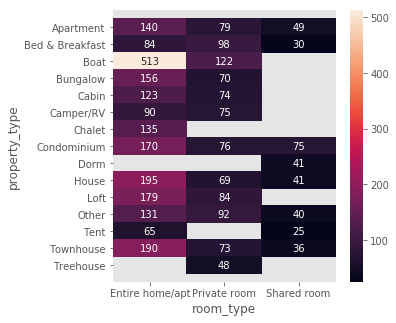

In [90]:
# lets plot the above data on the heatmap
# This will give the breakdown of the prices based on each room type for different proeprty type in Seattle.
# This will also show that the prices for entire House/Apartment are maximum.

import seaborn as sns
plt.figure(figsize=(5,5))

ax = sns.heatmap(inputDF.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt = ".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 6. Analysing the number of Bedroom affecting the price of the listings

(87.5, -0.5)

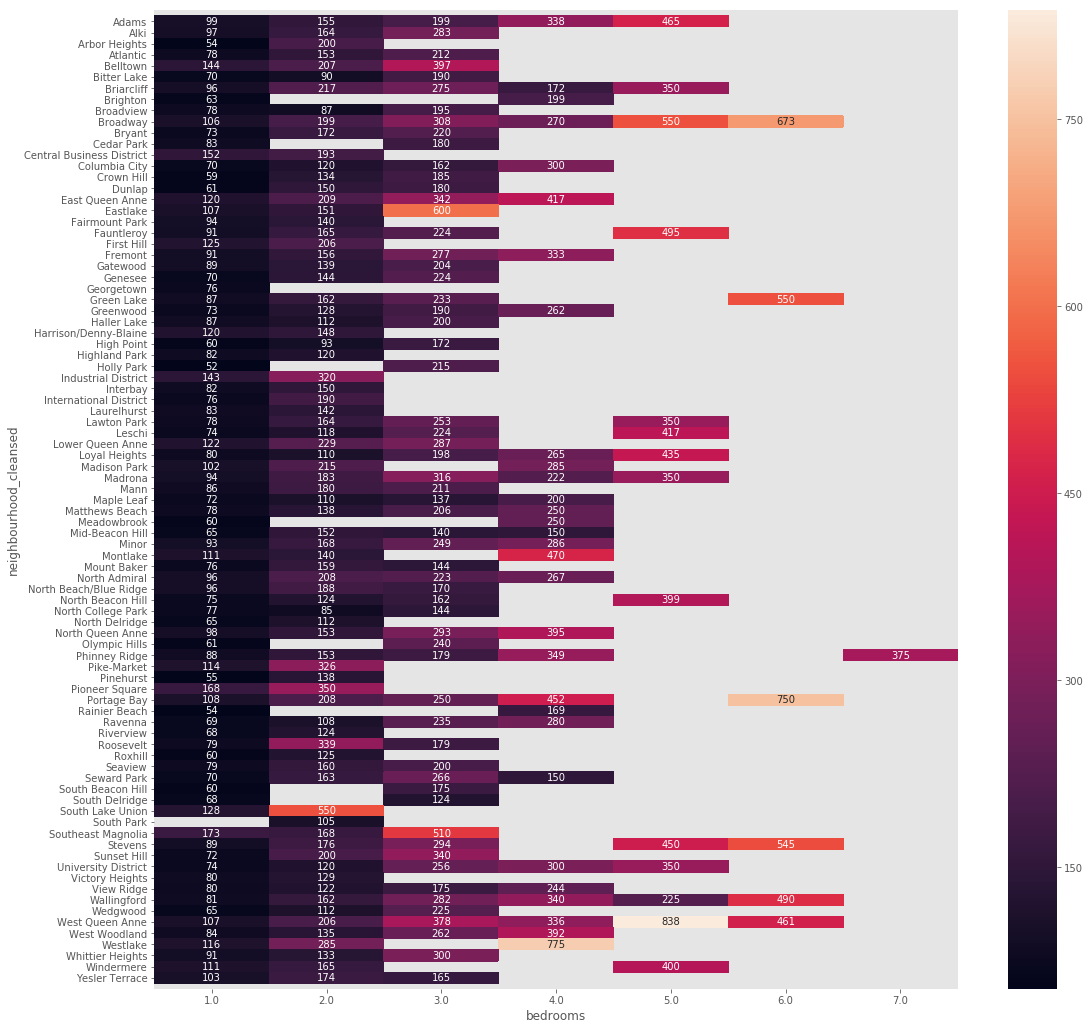

In [96]:
# ploting the heatmap to show the variations of prices for number bedrooms for listings
# This will show that the prices increases with increase in bedrooms.

import seaborn as sns
plt.figure(figsize=(18,18))

ax = sns.heatmap(inputDF.groupby(['neighbourhood_cleansed','bedrooms']).price.mean().unstack(), annot=True, fmt= ".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### We can analyse now that the prices on Airbnb depends on property type , room type and bedroom along with neighbourhood 

### 7. Analysing the average prices for each month and find out the month for which the average prices of the listings were high

Now we will be checking at what time of the year the prices fluctuate and the best time for travellers to visit Seattle. For this we will use the Calendar.csv

In [52]:
import numpy as np
import pandas as pd
import re

CalendarDF= pd.read_csv('Calendar.csv')
print(CalendarDF.head())

   listing_id      date available    price
0      241032  1/4/2016         t  $85.00 
1      241032  1/5/2016         t  $85.00 
2      241032  1/6/2016         f      NaN
3      241032  1/7/2016         f      NaN
4      241032  1/8/2016         f      NaN


In [53]:
# replacing NaN values with 0
CalendarDF.fillna(0, inplace=True)

print(CalendarDF.head())

   listing_id      date available    price
0      241032  1/4/2016         t  $85.00 
1      241032  1/5/2016         t  $85.00 
2      241032  1/6/2016         f        0
3      241032  1/7/2016         f        0
4      241032  1/8/2016         f        0


In [54]:
# removing rows with 0 pricing
CalendarDF = CalendarDF[CalendarDF.price !=0]
print(CalendarDF.head())

    listing_id       date available    price
0       241032   1/4/2016         t  $85.00 
1       241032   1/5/2016         t  $85.00 
9       241032  1/13/2016         t  $85.00 
10      241032  1/14/2016         t  $85.00 
14      241032  1/18/2016         t  $85.00 


In [55]:
#Extracting prices

price = CalendarDF['price']

prices =[]

for p in price:
    p= re.sub('[^0-9.]','',p)
    prices.append(float(p))


In [56]:
#replace the price column with the new column

CalendarDF['price']=prices

CalendarDF = CalendarDF[CalendarDF.price >= 0]

print(CalendarDF.head())

    listing_id       date available  price
0       241032   1/4/2016         t   85.0
1       241032   1/5/2016         t   85.0
9       241032  1/13/2016         t   85.0
10      241032  1/14/2016         t   85.0
14      241032  1/18/2016         t   85.0


In [57]:
# separating date column into day month and year

CalendarDF[['Month','Day','Year']]= CalendarDF['date'].str.split("/",expand=True)

CalendarDF.head()


,listing_id,date,available,price,Month,Day,Year
0,241032,1/4/2016,t,85.0,1,4,2016
1,241032,1/5/2016,t,85.0,1,5,2016
9,241032,1/13/2016,t,85.0,1,13,2016
10,241032,1/14/2016,t,85.0,1,14,2016
14,241032,1/18/2016,t,85.0,1,18,2016


In [59]:
# lets check now the prices based on the year and month

YearDF = CalendarDF.groupby(['Year','Month']).price.mean()

YearDF = YearDF.reset_index()

YearDF = YearDF.rename(columns={'price':'Average_price'})

YearDF['Year-Month'] = YearDF['Year'].map(str)+"-"+YearDF['Month'].map(str)

print(YearDF.head())

   Year Month  Average_price Year-Month
0  2016     1     123.817818     2016-1
1  2016    10     139.166124    2016-10
2  2016    11     137.422926    2016-11
3  2016    12     139.260159    2016-12
4  2016     2     126.325086     2016-2


In [ ]:
# Now we will visualize in which period the prices of listings in Seattle were high

Text(0,0.5,'Average prices')

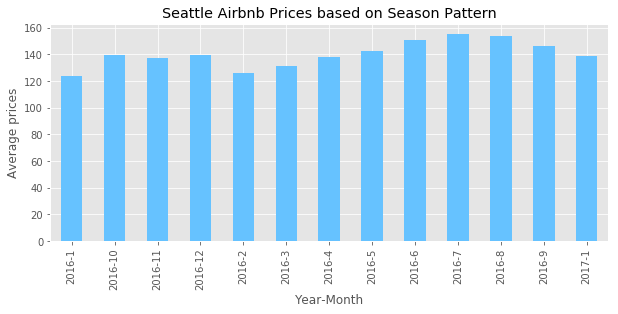

In [67]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

YearDF.plot(kind='bar', 
           x='Year-Month',
           y='Average_price',
           color = '#66c2ff', 
           figsize =(10,4), 
           title = 'Seattle Airbnb Prices based on Season Pattern', 
           legend = False)
plt.ylabel('Average prices')


#### From the above Bar chart we can analyse that July and August were the peak months were the average prices of the listings were high in Seattle in the Year 2016-2017